Distance        -0.343696
Body Battery    -0.203832
Sleep           -0.504966
stress           0.192567
Total Ascent     0.146857
Total Descent    0.149212
Temperature     -0.459266
Avg Pace         1.000000
Calories        -0.245905
Name: Avg Pace, dtype: float64


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


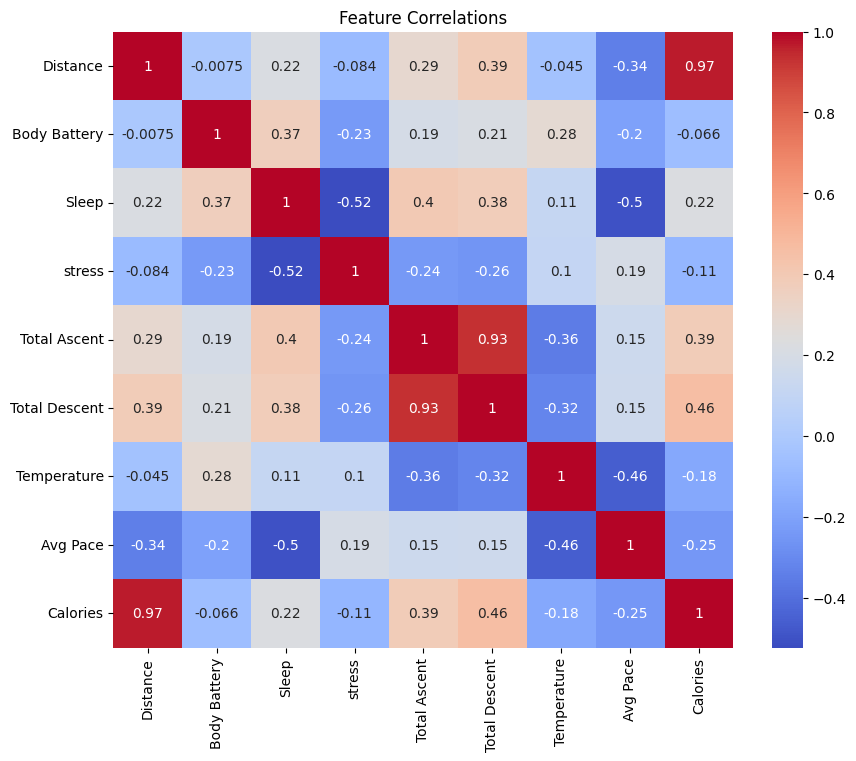

Distance        -0.340623
Body Battery    -0.187962
Sleep           -0.452848
stress           0.190588
Total Ascent     0.207503
Total Descent    0.200576
Temperature     -0.471007
Avg Pace         1.000000
Calories        -0.238608
Name: Avg Pace, dtype: float64


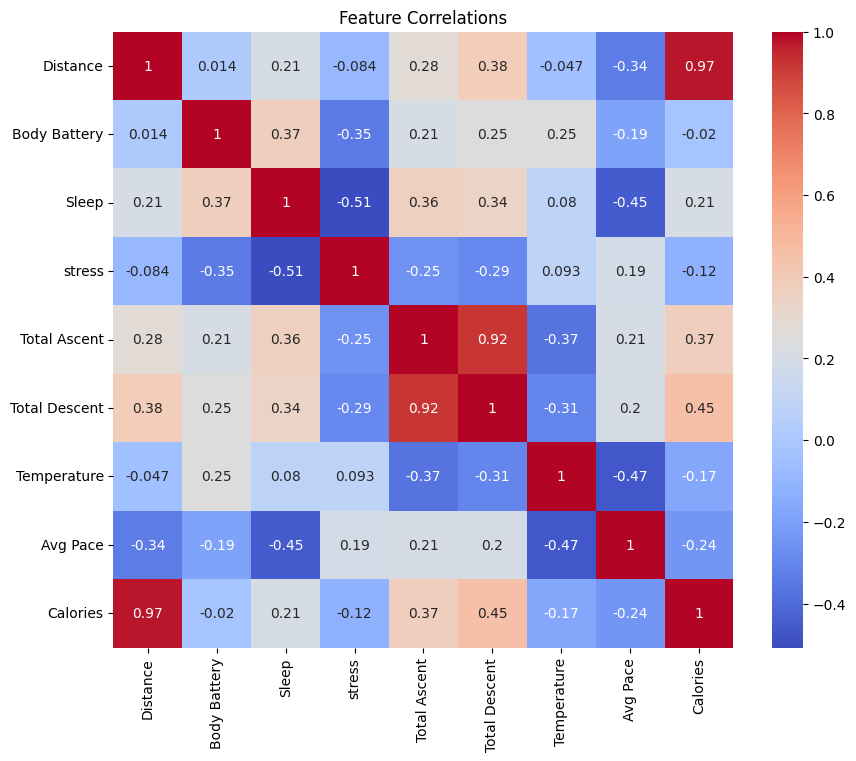


========== Fold 1/5 ==========
Epoch 5/10, Train Loss: 1.0356
Epoch 10/10, Train Loss: 1.0067
Fold 1 Validation Loss: 0.7268
Saved model to smart_run_fold_1.pt

========== Fold 2/5 ==========
Epoch 5/10, Train Loss: 1.0121
Epoch 10/10, Train Loss: 0.9955
Fold 2 Validation Loss: 1.0728
Saved model to smart_run_fold_2.pt

========== Fold 3/5 ==========
Epoch 5/10, Train Loss: 1.1010
Epoch 10/10, Train Loss: 1.0692
Fold 3 Validation Loss: 0.9338
Saved model to smart_run_fold_3.pt

========== Fold 4/5 ==========
Epoch 5/10, Train Loss: 0.9655
Epoch 10/10, Train Loss: 0.9443
Fold 4 Validation Loss: 1.0883
Saved model to smart_run_fold_4.pt

========== Fold 5/5 ==========
Epoch 5/10, Train Loss: 0.9714
Epoch 10/10, Train Loss: 0.9507
Fold 5 Validation Loss: 1.1190
Saved model to smart_run_fold_5.pt


In [1]:
from preprocessing import preprocess
from train import train_model
from train import train_model_kfold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import torch
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv("../data/Activities-6-2-2.csv")
X_scaled, y_scaled = preprocess(df)
# model, train_losses, val_losses, test_mse = train_model(X_scaled, y_scaled)
train_losses, fold_losses = train_model_kfold(X_scaled, y_scaled, 5)

# print("MSE:", test_mse)

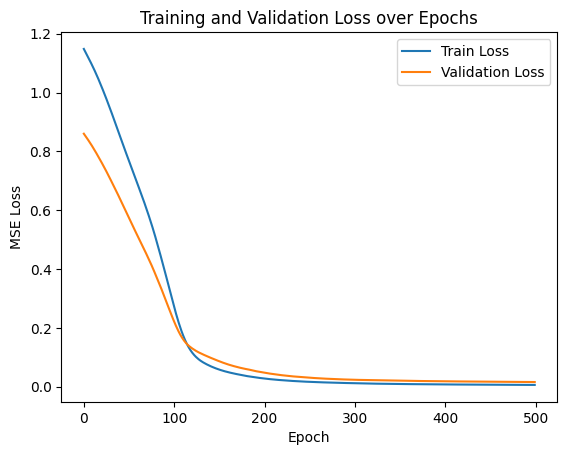

In [2]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss over Epochs")
plt.show()

In [8]:
torch.save(model.state_dict(), "model.pt")

In [5]:
# Prepare new input
X_new = np.array([[5, 30, 470, 30, 100, 100, 30]])
scaler_X = joblib.load("scaler_X.save")
scaler_y = joblib.load("scaler_y.save")

X_new_scaled = scaler_X.transform(X_new)
X_new_tensor = torch.tensor(X_new_scaled, dtype=torch.float32)

# Predict
with torch.no_grad():
    y_pred = model(X_new_tensor).numpy()
    y_new = scaler_y.inverse_transform(y_pred)

print("Predicted:", y_new)

Predicted: [[409.68564 458.51218]]


In [11]:
from map import geocode_address
from geopy.geocoders import Nominatim

lon, lat = geocode_address("Bischofstraße 15, Aachen, Germany")

In [12]:
from dotenv import load_dotenv
import os

load_dotenv()  # load .env file

ORS_API_KEY = os.environ["ORS_API_KEY"]
print(ORS_API_KEY)

eyJvcmciOiI1YjNjZTM1OTc4NTExMTAwMDFjZjYyNDgiLCJpZCI6IjEzNWMxYTFkMTA1YjRmMTM4NjVlNzM3OTZhOGQwMTgyIiwiaCI6Im11cm11cjY0In0=


In [13]:
from map import route_plan

coordinates, m = route_plan(ORS_API_KEY, lon, lat, 6, 1)
m

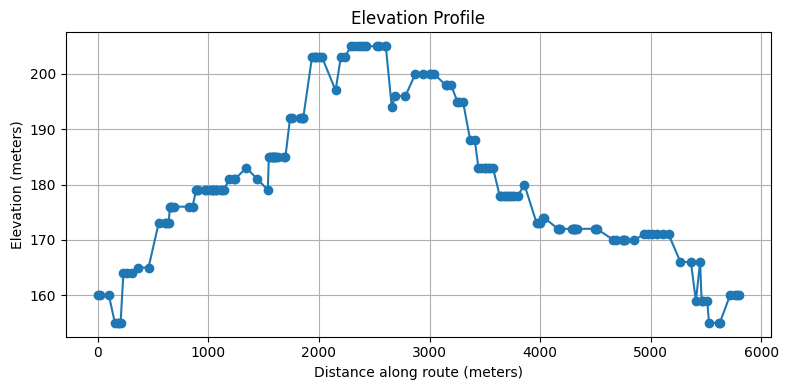

In [11]:
from map import elevation
import matplotlib.pyplot as plt

elevations, distances = elevation(coordinates)
# Plot
plt.figure(figsize=(8, 4))
plt.plot(distances, elevations, marker="o")
plt.xlabel("Distance along route (meters)")
plt.ylabel("Elevation (meters)")
plt.title("Elevation Profile")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from map import des_asc

total_ascent, total_descent = des_asc(elevations)
print("Total ascent:", total_ascent)
print("Total descent:", total_descent)

Total ascent: 82.0
Total descent: 82.0
